In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
#Load test data
DATA_TEST_PATH = '../../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Data Visualization

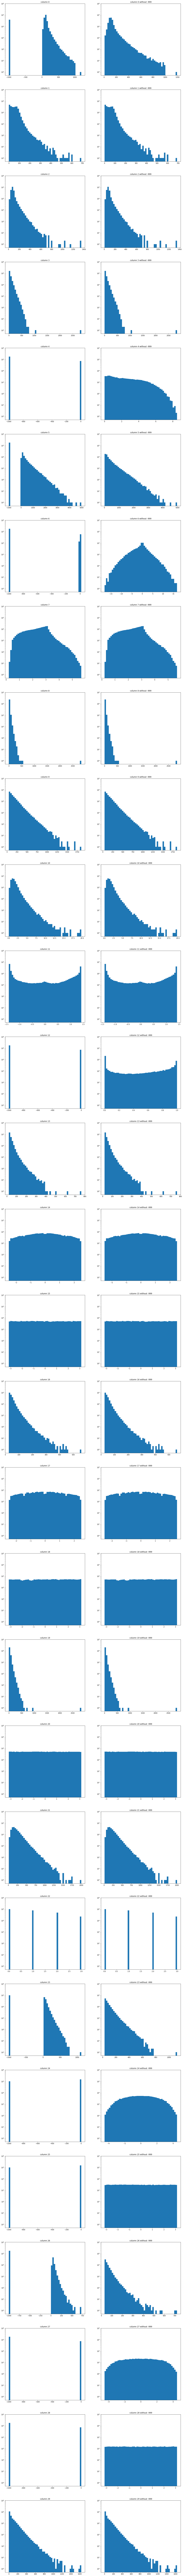

In [3]:
## Looking at the distribution of the data in each column, with raw data and after removing "-999" representing
## the missing values

plt.subplots(len(tX[0]),2, figsize=(20,300))
for i in range(len(tX[0])):
    
    plt.subplot(len(tX[0]),2,2*i+1)
    plt.hist(tX[:,i], bins = 50, log=True)
    plt.title("column " + str(i))
    plt.ylim(0.5, 1000000)
    
    x = tX[:,i]
    x = [value for value in x if value != -999]
    plt.subplot(len(tX[0]),2,2*i+2)
    plt.hist(x, bins=50, log=True)
    plt.title("column " + str(i) + " without -999")
    plt.ylim(0.5, 1000000)
    
plt.show()

In [4]:
## Collecting the data into a panda dataframe

data = pd.read_csv(DATA_TRAIN_PATH)
data.columns = range(32)
data = data[range(2,32)]
data.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
## Computing the correlation matrix with raw data

corr = pd.DataFrame.corr(data)
corr["to ignore"]=[-1]*30
corr.style.background_gradient(cmap='coolwarm',axis=1).set_precision(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,to ignore
2,1,-0.46,0.17,0.2,0.16,0.16,0.16,0.23,0.046,0.2,-0.017,0.36,0.16,0.13,0.0026,-0.0062,0.099,0.01,-0.00074,-0.23,0.0074,0.22,0.22,0.25,0.25,0.25,0.16,0.16,0.16,0.19,-1
3,-0.46,1,0.19,-0.25,-0.18,-0.19,-0.18,0.043,0.018,-0.15,0.35,-0.42,-0.18,-0.15,-0.0021,0.0011,0.31,-0.0068,0.00034,0.18,-0.016,-0.17,-0.21,-0.23,-0.22,-0.22,-0.18,-0.18,-0.18,-0.21,-1
4,0.17,0.19,1,-0.063,-0.032,-0.041,-0.032,0.58,-0.0007,0.089,0.097,-0.091,-0.032,0.29,0.0021,-0.0036,0.41,0.0022,-0.002,-0.087,-0.0015,0.053,-0.027,-0.019,-0.014,-0.014,-0.033,-0.032,-0.032,-0.053,-1
5,0.2,-0.25,-0.063,1,0.52,0.53,0.52,-0.54,0.31,0.83,0.089,0.54,0.52,0.41,0.0017,0.0052,0.36,0.0084,-0.0029,0.68,0.0086,0.78,0.62,0.62,0.56,0.56,0.53,0.52,0.52,0.81,-1
6,0.16,-0.18,-0.032,0.52,1,0.95,1,-0.3,0.27,0.67,0.041,0.37,1,0.19,0.0049,0.0033,0.17,0.0087,6.9e-05,0.31,0.0052,0.62,0.87,0.55,0.52,0.52,1,1,1,0.71,-1
7,0.16,-0.19,-0.041,0.53,0.95,1,0.94,-0.3,0.25,0.68,0.028,0.37,0.95,0.2,0.0036,0.0033,0.16,0.0076,-0.0006,0.32,0.0052,0.62,0.81,0.52,0.49,0.49,0.95,0.95,0.95,0.72,-1
8,0.16,-0.18,-0.032,0.52,1,0.94,1,-0.3,0.27,0.67,0.042,0.37,1,0.19,0.0049,0.0033,0.17,0.0087,7e-05,0.31,0.0053,0.62,0.87,0.55,0.52,0.52,1,1,1,0.71,-1
9,0.23,0.043,0.58,-0.54,-0.3,-0.3,-0.3,1,-0.15,-0.43,0.047,-0.21,-0.3,-0.2,0.0036,-0.011,-0.07,0.0007,-0.00078,-0.4,-0.0016,-0.41,-0.35,-0.34,-0.3,-0.3,-0.3,-0.3,-0.3,-0.45,-1
10,0.046,0.018,-0.0007,0.31,0.27,0.25,0.27,-0.15,1,0.38,0.039,0.18,0.27,0.096,0.0036,0.0015,0.11,0.008,-0.0042,0.27,0.0025,0.45,0.36,0.2,0.19,0.19,0.28,0.27,0.27,0.4,-1
11,0.2,-0.15,0.089,0.83,0.67,0.68,0.67,-0.43,0.38,1,0.11,0.42,0.67,0.49,0.002,0.0039,0.46,0.0088,-0.0019,0.52,0.0067,0.9,0.76,0.64,0.58,0.58,0.69,0.67,0.67,0.97,-1


In [6]:
## Computing the correlation matrix without taking the missing values into account

data.replace(to_replace=-999, value= np.nan, inplace=True)
corr = pd.DataFrame.corr(data)
corr["to ignore"]=[-1]*30
corr.style.background_gradient(cmap='coolwarm',axis=1).set_precision(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,to ignore
2,1,0.22,0.91,0.024,-0.027,-0.022,0.019,0.5,0.014,0.12,0.071,0.02,-0.034,0.27,0.0026,-0.0031,0.34,0.0035,-0.0032,0.1,-8.1e-05,0.088,0.015,0.0065,0.0025,0.0066,-0.016,0.005,-0.0019,0.011,-1
3,0.22,1,0.19,-0.25,-0.13,-0.13,0.12,0.043,0.018,-0.15,0.35,-0.42,-0.11,-0.15,-0.0021,0.0011,0.31,-0.0068,0.00034,0.18,-0.016,-0.17,-0.21,-0.15,7.2e-05,0.0068,-0.036,0.0018,0.0069,-0.21,-1
4,0.91,0.19,1,-0.063,-0.039,-0.055,0.033,0.58,-0.0007,0.089,0.097,-0.091,-0.053,0.29,0.0021,-0.0036,0.41,0.0022,-0.002,-0.087,-0.0015,0.053,-0.027,-0.076,0.0026,0.0056,-0.049,0.0022,-0.00069,-0.053,-1
5,0.024,-0.25,-0.063,1,-0.038,0.19,-0.026,-0.54,0.31,0.83,0.089,0.54,0.016,0.41,0.0017,0.0052,0.36,0.0084,-0.0029,0.68,0.0086,0.78,0.62,0.83,0.0028,0.00099,0.36,0.00019,-0.0078,0.81,-1
6,-0.027,-0.13,-0.039,-0.038,1,0.8,-0.84,0.031,-0.15,-0.1,-0.084,0.11,0.64,0.018,-0.0045,-0.0032,-0.08,-0.0065,0.00022,-0.059,-0.0031,-0.14,-0.18,-0.044,-0.002,-0.00082,-0.09,-0.0048,0.0012,-0.11,-1
7,-0.022,-0.13,-0.055,0.19,0.8,1,-0.76,-0.12,-0.036,0.23,-0.05,0.15,0.48,0.11,-0.006,0.0011,0.022,-0.0037,-0.0038,0.13,0.0012,0.16,-0.074,0.28,-0.00073,0.00098,0.24,-0.0031,-0.0022,0.24,-1
8,0.019,0.12,0.033,-0.026,-0.84,-0.76,1,0.011,0.11,0.014,0.061,-0.12,-0.56,-0.041,0.0042,0.0014,0.039,0.0036,0.00024,0.01,0.0027,0.047,0.12,-0.027,-0.0035,-0.003,0.0029,-0.0025,0.0021,0.018,-1
9,0.5,0.043,0.58,-0.54,0.031,-0.12,0.011,1,-0.15,-0.43,0.047,-0.21,-0.017,-0.2,0.0036,-0.011,-0.07,0.0007,-0.00078,-0.4,-0.0016,-0.41,-0.35,-0.48,-0.00016,0.0068,-0.23,0.0019,0.0072,-0.45,-1
10,0.014,0.018,-0.0007,0.31,-0.15,-0.036,0.11,-0.15,1,0.38,0.039,0.18,-0.12,0.096,0.0036,0.0015,0.11,0.008,-0.0042,0.27,0.0025,0.45,0.36,0.22,-0.0062,0.0042,0.32,0.00073,-0.0048,0.4,-1
11,0.12,-0.15,0.089,0.83,-0.1,0.23,0.014,-0.43,0.38,1,0.11,0.42,-0.038,0.49,0.002,0.0039,0.46,0.0088,-0.0019,0.52,0.0067,0.9,0.76,0.88,0.00097,0.0031,0.73,-0.0005,-0.0089,0.97,-1


D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


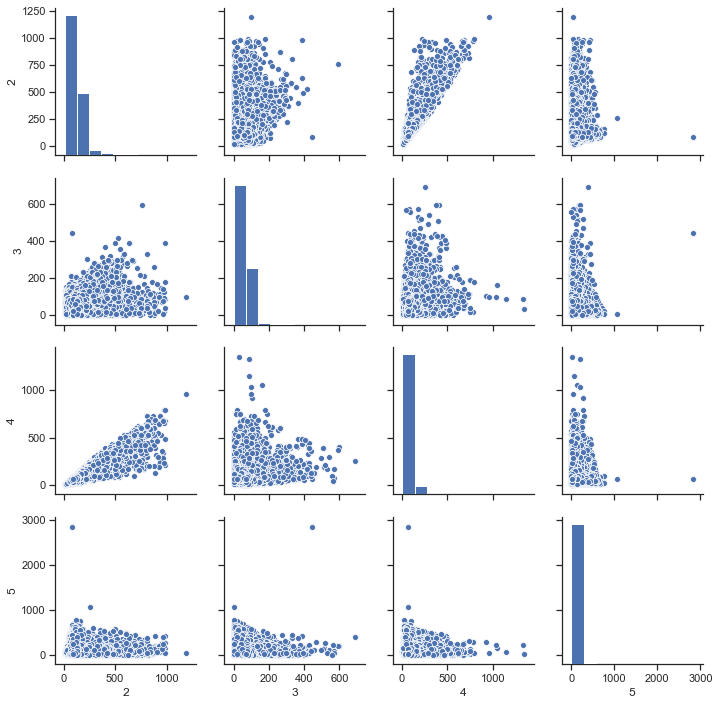

In [7]:
## Attempt of pairwise visualization

sns.set(style="ticks", color_codes=True)
sns.pairplot(data, vars=range(2,6))

## Implementations of machine learning methods

In [8]:
##Implementations of the required function

#Linear regression using gradient descent
def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    nIters = 0 #Keep count of iterations
    w = initial_w #Current weights
    n = len(y) #Number of observations
    while (nIters < max_iters):
        e = y - np.dot(tx, w) #Residual vector
        gradient = -np.dot(np.transpose(tx), e) / n #Gradient
        w -= gamma * gradient #A step towards negative gradient
        nIters += 1 #Update number of iterations
    e = y - np.dot(tx, w) #Compute final residuals
    return w, np.dot(np.transpose(e), e) / (2 * n) #Return weights and loss (2n as a scaler)

#Linear regression using stochastic gradient descent
def least_squares_SGD(y, tx, initial_w, max_iters, gamma):
    nIters = 0 #Keep track of iterations
    w = initial_w #Update w
    n = len(y) #Number of datapoints
    while (nIters < max_iters):
        index = np.random.randint(0, n) #Pick a row uniformly
        row = tx[index, :] #Select the chosen row 
        e = y[index] - np.dot(row, w) #Calculate the estimate for error
        gradient = -np.dot(np.transpose(row), e) #Calculate the estimate for the gradient
        w -= gamma * gradient #Update w
        nIters += 1 #Update number of iterations
    e = y - np.dot(tx, w) #Calculate the residuals for the final loss
    return w, np.dot(np.transpose(e), e) / (2 * n) #Return the weights and the loss (2n as a scaler)

#Least squares regression using normal equations
def least_squares(y, tx):
    xtx = np.dot(np.transpose(tx), tx) #Calculate the Gram matrix
    w = np.dot(np.dot(np.linalg.inv(xtx), np.transpose(tx)), y) #Calculate the weigths
    e = y - np.dot(tx, w) #Calculate the residuals
    loss = np.dot(np.transpose(e), e) / (2 * len(y)) #Calculate the loss (2n as a scaler)
    return w, loss

#Ridge regression using normal equations
def ridge_regression(y, tx, lambda_):
    xtx = np.dot(np.transpose(tx), tx) + lambda_ * np.identity(np.shape(tx)[1]) #Calculate the modified Gram matrix
    w = np.dot(np.dot(np.linalg.inv(xtx), np.transpose(tx)), y) #Calculate the weigths
    e = y - np.dot(tx, w) #Calculate residuals
    loss = np.dot(np.transpose(e), e) / (2 * len(y)) #Calculate the loss (2n as a scaler)
    return w, loss

#A helper for the logistic regression
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

#Logistic regression using gradient descent
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    nIters = 0
    w = initial_w
    n = len(y)
    while (nIters < max_iters): 
        gradient = np.dot(np.transpose(tx), sigmoid(np.dot(tx, w)) - y)
        w -= gamma * gradient #Calculate new w
        nIters += 1 #Update number of iterations
    loss = np.sum(np.log(1 + np.exp(np.dot(tx, w))) - y * np.dot(tx, w))
    return w, loss #Return weights and loss

#Regularized logistic regression using gradient descent or SGD
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    #xxxx
    nIters = 0
    w = initial_w
    n = len(y)
    while (nIters < max_iters): 
        ##Calculate the hessian matrix
        S = sigmoid(np.dot(tx, w))
        S = S * (1 - S)
        tmp = np.transpose((np.transpose(tx) * S))
        hessian = np.dot(np.transpose(tx), tmp) + lambda_
        
        #Calculate the gradient
        gradient = np.dot(np.transpose(tx), sigmoid(np.dot(tx, w)) - y) + lambda_ * w
        #Update w
        w -= gamma * np.dot(np.linalg.inv(hessian), gradient)
        #Update number of iterations
        nIters += 1
        
    #Calculate the loss
    loss = np.sum(np.log(1 + np.exp(np.dot(tx, w)))) - np.sum(np.dot(y, np.dot(tx, w))) + lambda_ / 2 * np.linalg.norm(w)
    return w, loss #Return weights and loss


## Data cleaning and pre-processing functions

In [9]:
## Functions for cleaning and manipulating the data
def replace_with_mean(data, replacedValue):
    means = []
    def replace_one_col(x):
        m = np.mean(x[x != replacedValue])
        x[x == replacedValue] = m
        means.append(m)
        return x
    return np.apply_along_axis(replace_one_col, 0, np.copy(data)), means

def replace_with_values(data, values, replacedValue):
    result = np.copy(data)
    for i in range(np.shape(data)[1]):
        for j in range(np.shape(data)[0]):
            if result[j, i] == replacedValue:
                result[j, i] = values[i]
    return result
            
def centralize_data(data):
    return np.apply_along_axis(lambda x: x - np.mean(x), 0, np.copy(data))

def subtract_values(data, values):
    result = np.copy(data)
    for i in range(np.shape(data)[1]):
        for j in range(np.shape(data)[0]):
            result[j, i] = result[j, i] - values[i]
    return result


def scale_data(data):
    deviations = np.apply_along_axis(lambda x: np.std(x), 0, np.copy(data))
    deviations[deviations == 0] = 1
    return np.apply_along_axis(lambda x: x / np.std(x) if np.std(x) != 0 else x, 0, np.copy(data)), deviations

def divide_by_values(data, values):
    result = np.copy(data)
    for i in range(np.shape(data)[1]):
        for j in range(np.shape(data)[0]):
            result[j, i] = result[j, i] / values[i]
    return result

def add_constant_term(data):
    a = np.ones((np.shape(data)[0], np.shape(data)[1] + 1))
    a[:, :-1] = data
    return a

def add_missing_value_info(data, missingValue):
    a = np.zeros((np.shape(data)[0], np.shape(data)[1] + 1))
    a[:, :-1] = data
    a[:, np.shape(a)[1] - 1] = np.apply_along_axis(lambda x: np.sum(x == missingValue), 1, data)
    return a


In [10]:
##Data Separation
##Idea : if the data in the 22nd column is equal to 2 or 3 : no data will be missing (30 columns left)
## --------------------------------------------- to 1 : columns 4,5,6,12,26,27,28 will be missing (23 columns left)
## --------------------------------------------- to 0 : columns 4,5,6,12,23,24,25,26,27,28 will be missing (20 columns left)

def data_separation(y, tX):
    ##Initialisation of the matrices
    tX_0 = []
    tX_1 = []
    tX_23 = []
    
    y0 = []
    y1 = []
    y23 = []
    
    ##Going through the values and puting the data values in the right matrices
    n = np.shape(tX)[0]
    for i in range(n):
        if (tX[i,22] == 0):
            lign0 = []
            for j in range(30):
                if (j != 4) and (j != 5) and (j != 6) and (j != 12) and (j != 23) and (j != 24) and (j != 25) and (j != 26) and (j != 27) and (j != 28):
                    lign0.append(tX[i,j])
            tX_0.append(lign0)
            y0.append(y[i])
            
        elif (tX[i,22] == 1):
            lign1 = []
            for j in range(30):
                if (j != 4) and (j != 5) and (j != 6) and (j != 12) and (j != 26) and (j != 27) and (j != 28):
                    lign1.append(tX[i,j])
            tX_1.append(lign1)
            y1.append(y[i])
            
        else:
            lign23 = []
            for j in range(30):
                lign23.append(tX[i,j])
            tX_23.append(lign23)
            y23.append(y[i])
            
    return tX_0, tX_1, tX_23, y0, y1, y23

In [11]:
## Functions for model validation
def split_data(x, y, ratio, seed = 1):
    #Split the dataset based on the split ratio.
    np.random.seed(seed) #Set a seed for reproducilbility
    trainSize = int(np.round(len(y) * ratio)) #Calculate the desired size of the train data set 
    trainIndexes = np.random.choice(len(y), trainSize, False) #Sample the training data
    testIndexes = np.setdiff1d(np.arange(len(y)), trainIndexes, assume_unique=True) #Select the test data
    return x[trainIndexes, :], y[trainIndexes], x[testIndexes, :], y[testIndexes]


In [12]:
tX1, means = replace_with_mean(tX, -999)
tX1, deviations = scale_data(centralize_data(tX1))
tX1 = add_constant_term(tX1)

## Training of the machine learning methods

In [13]:
### Fit models

#We compare different models using the prediction accuracies as it will also be the final criterion used to evaluate the performace of our model.
#The comparison is done using a test set containing 20% of the original data. We first compare whetrher the GD, SGD and the
#closed least square functions give the same models. Then we fit a ridge regression model
#using different regularization parameters and finally a logistic regression model and regularized logistic regression
#models using different parameters. The best model is chosen using cross validation. The hyperparameters for the regularized 
#regression are searched using a cross validation method.

trainX, trainY, testX, testY = split_data(tX1, y, 0.8, seed = 1)

In [14]:
##Linear models:
#The models are fitted to the preprocessed and centralized data and a learning rate of 0.1
#is used in the GD and SGD algorithms.

#1. A model using GD
weightsGD, lossGD = least_squares_GD(trainY, trainX, np.zeros(np.shape(trainX)[1]), 2000, 0.1)

#2. A model using SGD
weightsSGD, lossSGD = least_squares_SGD(trainY, trainX, np.zeros(np.shape(trainX)[1]), 200000, 0.001)

#3. A model using closed form solution for the least squares
weightsLSQ, lossLSQ = least_squares(trainY, trainX)

#Check for differences in losses and weights

print("Loss ratio1: ", lossLSQ / lossGD)
print("Loss ratio2: ", lossLSQ / lossSGD)
print(weightsGD)
print(weightsSGD)
print(weightsLSQ)
print("Weight differences: ", weightsLSQ - weightsSGD)
print("Max weight difference1: ", np.max(weightsLSQ - weightsSGD))
print("Max weight difference1: ", np.max(weightsLSQ - weightsGD))

#The results are close to each other. However, the weights for the categorical column
#have significant differences. This is likely to be a result of multicollinearity as
#the categorical value is related to the missing values and the columns with a 
#lot of missing values are highly dependent on this column. This is a potential drawback
#of the current modelling scheme.

Loss ratio1:  0.9999861044216304
Loss ratio2:  0.9743489847800421
[ 1.15063494e-02 -2.52298688e-01 -2.63709481e-01  3.34176556e-03
  2.13716291e-02  9.31434151e-02  6.93008526e-03  2.82413361e-01
 -2.78720786e-02  5.09758198e-02 -1.86907856e-01  1.18733690e-01
  7.70360364e-02  1.75275386e-01 -2.51772689e-04 -1.09002986e-03
  2.75883659e-01 -5.29119887e-04  2.66566644e-03  9.96600708e-02
  1.47606471e-04 -4.84580776e-02  4.75542869e-02 -4.40744333e-02
 -2.32489525e-04  4.71018970e-05 -3.46918213e-02  1.35877911e-03
 -2.44568053e-03 -4.20043919e-02 -3.15295561e-01]
[-0.02688727 -0.26127779 -0.30185783  0.04409469  0.00266873  0.09870087
 -0.01085036  0.29271324 -0.02832075  0.04144921 -0.22923951  0.10572155
  0.09213082  0.15134915  0.00121673  0.02899771  0.24776134  0.00089058
  0.03464693  0.06460283  0.00619474 -0.05697513  0.04361254 -0.07072615
  0.01081682  0.01424375 -0.03926173  0.00275159 -0.00319206 -0.04144913
 -0.30620441]
[ 1.15053653e-02 -2.52269476e-01 -2.63713153e-01  

In [15]:
### In this part, we will fit a model using ridge regression and try to find an optimal 
#regularization parameter using 5 fold cross validation. The used split ratio is 0.9.

#The losses will be calculated using prediction accuracy with a prediction threshold of 0.5.

folds = 5
lambdas = np.logspace(-2, 4, 30)
accuracies = np.zeros((len(lambdas), folds))

np.random.seed(123)
for k in range(folds):
    i = 0
    ridgeTrainX, ridgeTrainY, ridgeTestX, ridgeTestY = split_data(trainX, trainY, 0.9, seed = 1)
    for lambda_ in lambdas:
        weights, _ = ridge_regression(ridgeTrainY, ridgeTrainX, lambda_)
        predictions = np.dot(ridgeTestX, weights)
        predictions[predictions < 0] = -1
        predictions[predictions >= 0] = 1
        #Use a naive loss function (prediction accuracy)
        accuracy = np.mean(predictions == ridgeTestY)
        accuracies[i, k] = accuracy
        i += 1

# Select the model with the highest mean accuracy to be used later (some of the smallest values seem to be as good)
# The best of the tried lambdas seems to be about 356. Although the search space was quite small, by looking the accuracy table,
# the nearest tried lambdas gave about the same results.
ridgeLambda = lambdas[np.argmax(np.mean(accuracies, axis = 1))]


In [16]:
##Next, regularized logistic regression models will be fitted using the same kind of process as with the ridge regression.
##However, as the optimization algorithm is quite slow, only a 2 fold cross validation is performed and the search space is
#smaller
#xxxx

folds = 2
initialW = np.zeros(np.shape(trainX)[1])
lambdas = np.logspace(-2, 2, 20)
accuracies = np.zeros((len(lambdas), folds))

for k in range(folds):
    i = 0
    regularizedTrainX, regularizedTrainY, regularizedTestX, regularizedTestY = split_data(trainX, trainY, 0.6, seed = 123)
    regularizedTrainY[regularizedTrainY == -1] = 0
    regularizedTestY[regularizedTestY == -1] = 0
    weights = initialW
    
    for lambda_ in lambdas:
        weights, _ = reg_logistic_regression(regularizedTrainY, regularizedTrainX, lambda_, weights, 120, 0.01)
        predictions = np.dot(regularizedTestX, weights)
        predictions[predictions < 0.5] = 0
        predictions[predictions > 0] = 1
        #Use a naive loss function (prediction accuracy)
        accuracy = np.mean(predictions == regularizedTestY)
        accuracies[i, k] = accuracy
        i += 1

# Select the model with the highest mean accuracy to be used later
regLogRegLambda = lambdas[np.argmax(np.mean(accuracies, axis = 1))]


In [17]:
regLogRegLambda

0.29763514416313175

## Compairing the different methods applied to the whole dataset

In [18]:
##At this section, we are comparing different regression models using the test set
##The compared models are:
#1: Linear regression model fitted by the least_squares function
#2: Ridge regression using the lambda found earlier
#3: Regularized logistic regression using the lambda found earlier
#4: A logistic regression model

initialW = np.zeros(np.shape(trainX)[1])
accuracies = np.zeros(4)

np.random.seed(200)
print("Lsq")
#Least squares linear regression
lsqWeights, _ = least_squares(trainY, trainX)
lsqPreds = np.dot(testX, lsqWeights)
lsqPreds[lsqPreds < 0] = -1
lsqPreds[lsqPreds >= 0] = 1
accuracies[0] = np.mean(lsqPreds == testY)

print("Ridge")
#Penalized linear regression
ridgeWeights, _ = ridge_regression(trainY, trainX, ridgeLambda)
ridgePreds = np.dot(testX, ridgeWeights)
ridgePreds[ridgePreds < 0] = -1
ridgePreds[ridgePreds >= 0] = 1
accuracies[1] = np.mean(ridgePreds == testY)

print("Logistic regression")
#Logistic regression
trainY2 = np.copy(trainY)
testY2 = np.copy(testY)
trainY2[trainY2 == -1] = 0
testY2[testY2 == -1] = 0
logisticWeights, _ = logistic_regression(trainY2, trainX / 100, initialW, 40, 0.1)
logisticPreds = sigmoid(np.dot(testX / 100, logisticWeights))
logisticPreds[logisticPreds > 0.5] = 1
logisticPreds[logisticPreds <= 0.5] = 0
accuracies[2] = np.mean(logisticPreds == testY2)

print("Regularized logistic regression")
#Regularized logistic regression
regLogRegWeights, _ = reg_logistic_regression(trainY2, trainX / 100, regLogRegLambda, initialW, 1200, 0.001)
logisticPreds = sigmoid(np.dot(testX / 100, regLogRegWeights))
logisticPreds[logisticPreds > 0.5] = 1
logisticPreds[logisticPreds <= 0.5] = 0
accuracies[3] = np.mean(logisticPreds == testY2)


Lsq
Ridge
Logistic regression
Regularized logistic regression


In [20]:
print(accuracies)
print(logisticWeights)
#Best of the fitted models is the simple logistic regression model
#Fit this model using the whole training data and do predictions for the test data
y2 = np.copy(y)
y2[y2 < 0] = 0
fullModel, _ = logistic_regression(y2, tX1 / 100, np.zeros(np.shape(tX1)[1]), 40, 0.1) 
inSamplePreds = sigmoid(np.dot(tX1 / 100, fullModel))
inSamplePreds[inSamplePreds < 0.5] = 0
inSamplePreds[inSamplePreds >= 0.5] = 1
np.mean(inSamplePreds == y2)

##Predictions for the test data
tmp = replace_with_values(tX_test, means, -999)
model2TestData = add_constant_term(divide_by_values(subtract_values(tmp, means), deviations))
testPredictions = sigmoid(np.dot(model2TestData / 100, fullModel))
testPredictions[testPredictions < 0.5] = -1
testPredictions[testPredictions > 0] = 1
#Save predictions
#OUTPUT_PATH = '../../predictions/logistic_regression.csv' 
#create_csv_submission(ids_test, testPredictions, OUTPUT_PATH)


[0.74414 0.74436 0.74924 0.74574]
[ -4.99125099 -62.28767749 -41.52760751  20.14308691   5.73026584
  25.77152418   0.97106131  61.58677384  -8.69039874   9.85380012
 -35.78618516  26.93526159  18.87434215  42.13213184  -0.10351576
  -0.26049269  40.55396299  -0.07927137   0.86377251   9.69600065
   0.14397507  -7.5830507    4.05855844  -8.65785884  -0.10557295
   0.23808662 -11.62318862   0.45520175  -0.36083614  -6.86625366
 -77.36540196]


## Logistic Regression applied to data splitted in 3 matrices based on column 'PRI_jet_num'

In [23]:
## Regression using data_separation and the logistic regression method

trainX, trainY, testX, testY = split_data(tX, y, 0.8, seed = 1)

trainX0, trainX1, trainX23, trainY0, trainY1, trainY23 = data_separation(trainY, trainX)
testX0, testX1, testX23, testY0, testY1, testY23 = data_separation(testY, testX)

In [24]:
##Cleaning each of the matrices

scaled0, means0 = replace_with_mean(trainX0, -999)
scaled0, deviations0 = scale_data(centralize_data(scaled0))
trainX0 = add_constant_term(scaled0)
scaled1, means1 = replace_with_mean(trainX1, -999)
scaled1, deviations1 = scale_data(centralize_data(scaled1))
trainX1 = add_constant_term(scaled1)
scaled23, means23 = replace_with_mean(trainX23, -999)
scaled23, deviations23 = scale_data(centralize_data(scaled23))
trainX23 = add_constant_term(scaled23)

testX0 = add_constant_term(divide_by_values(subtract_values(replace_with_values(testX0,means0,-999), means0), deviations0))
testX1 = add_constant_term(divide_by_values(subtract_values(replace_with_values(testX1,means1,-999), means1), deviations1))
testX23 = add_constant_term(divide_by_values(subtract_values(replace_with_values(testX23,means23,-999), means23), deviations23))

In [25]:
##A function for fitting logistic regression models
def fit_logistic(data_y, data_x, test_x, test_y):
    model, loss = logistic_regression(data_y, data_x, np.zeros(np.shape(data_x)[1]), 40, 0.1)
    inSamplePredictions = sigmoid(np.dot(test_x, model))
    inSamplePredictions[inSamplePredictions < 0.5] = -1
    inSamplePredictions[inSamplePredictions >= 0.5] = 1
    inSampleAccuracy = np.mean(inSamplePredictions == test_y)
    return model, loss, means, deviations, inSampleAccuracy

##A function for fitting regularized logistic regression models
def fit_and_estimate_accuracy(trainX, trainY, testX, testY, lambda_, initialW):
    weights, _ = reg_logistic_regression(trainY, trainX / 1000, lambda_, initialW, 500, 0.00001)
    predictions = np.dot(testX, weights)
    predictions[predictions < 0.5] = 0
    predictions[predictions > 0] = 1
    #Use a naive loss function (prediction accuracy)
    accuracy = np.mean(predictions == testY)
    print(accuracy)
    return accuracy, weights


In [26]:
model0, loss0, means0, deviations0, inSampleAccuracy0 = fit_logistic(trainY0, trainX0 / 100, testX0/100, testY0)
model1, loss1, means1, deviations1, inSampleAccuracy1 = fit_logistic(trainY1, trainX1 / 100, testX1/100, testY1)
model23, loss23, means23, deviations23, inSampleAccuracy23 = fit_logistic(trainY23, trainX23 / 100, testX23/100, testY23)

## Printing the accuracies for each of the 3 smaller matrices and the total accuracy
totalAccuracy = np.shape(trainX0)[0] * inSampleAccuracy0 + np.shape(trainX1)[0] * inSampleAccuracy1 + np.shape(trainX23)[0] * inSampleAccuracy23
totalAccuracy = totalAccuracy / np.shape(trainX)[0]
print(100 * totalAccuracy)
print(100 * inSampleAccuracy0)
print(100 * inSampleAccuracy1)
print(100 * inSampleAccuracy23)

73.44419313520321
80.38019009504752
67.99280159393277
69.71835859110097
